In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import Precision, Recall, AUC
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns



In [ ]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.svm import SVC
# from sklearn.preprocessing import StandardScaler,MinMaxScaler
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
#
# import plotly.express as px

In [ ]:
# Load dataset
data = pd.read_csv('/content/drive/MyDrive/creditcard.csv')

# Separate features and target variable
X = data.drop(columns=['Class', 'Time'])
y = data['Class'].astype(int).values  # Ensure y is integer and as numpy array



In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


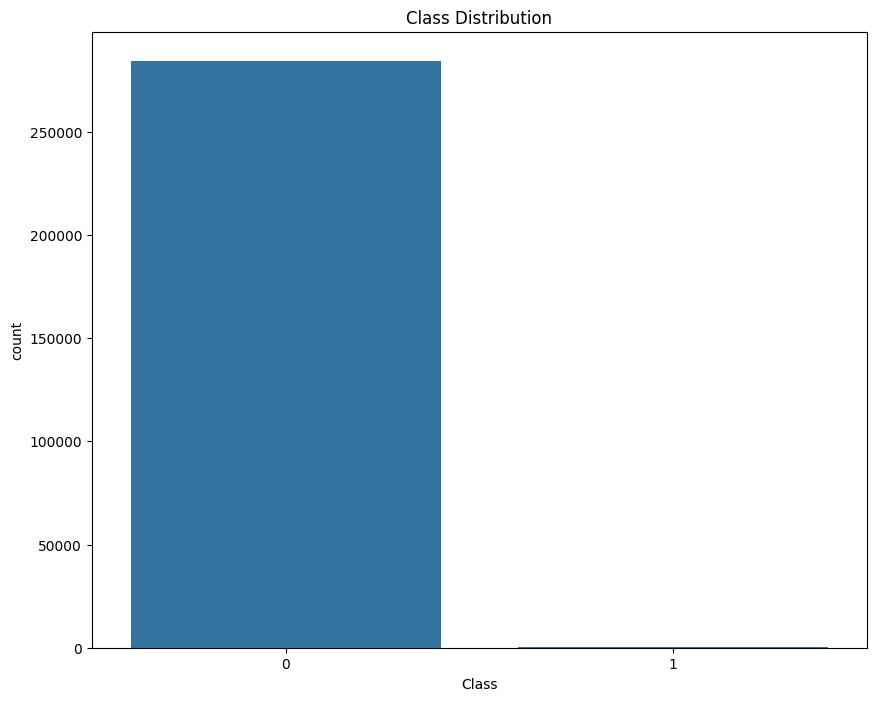

In [ ]:
# Bar graph for class distribution (assuming binary classification in the 'Class' column)
plt.figure(figsize=(10,8))
sns.countplot(x='Class', data=data)
plt.title('Class Distribution')
plt.show()


In [ ]:
# # Scatter plot for two features (for example, 'V1' and 'V2', modify as needed)
# plt.figure(figsize=(8, 6))
# # convert the values in columns 'V1' and 'V2' to numeric.
# # If errors='coerce', then invalid parsing will be set as NaN
# plt.scatter(pd.to_numeric(data['V1'],errors='coerce'), pd.to_numeric(data['V2'], errors='coerce'), alpha=0.5)
# plt.title('Scatter plot between V1 and V2')
# plt.xlabel('V1')
# plt.ylabel('V2')
# plt.show()

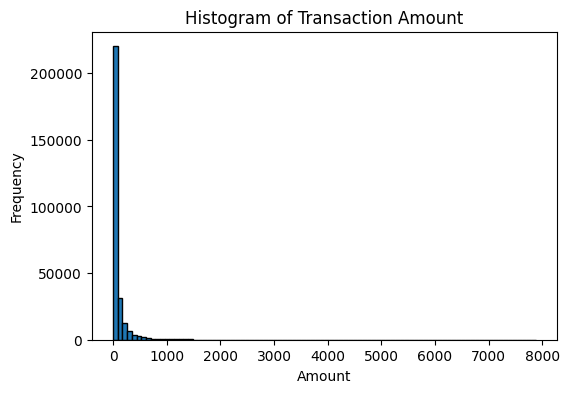

In [ ]:

# Histogram for a feature (for example, 'Amount')
plt.figure(figsize=(6, 4))
plt.hist(data['Amount'], bins=90, edgecolor='black')
plt.title('Histogram of Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()


In [ ]:
col=data.columns

In [ ]:
data=data.drop(columns=['Time'])

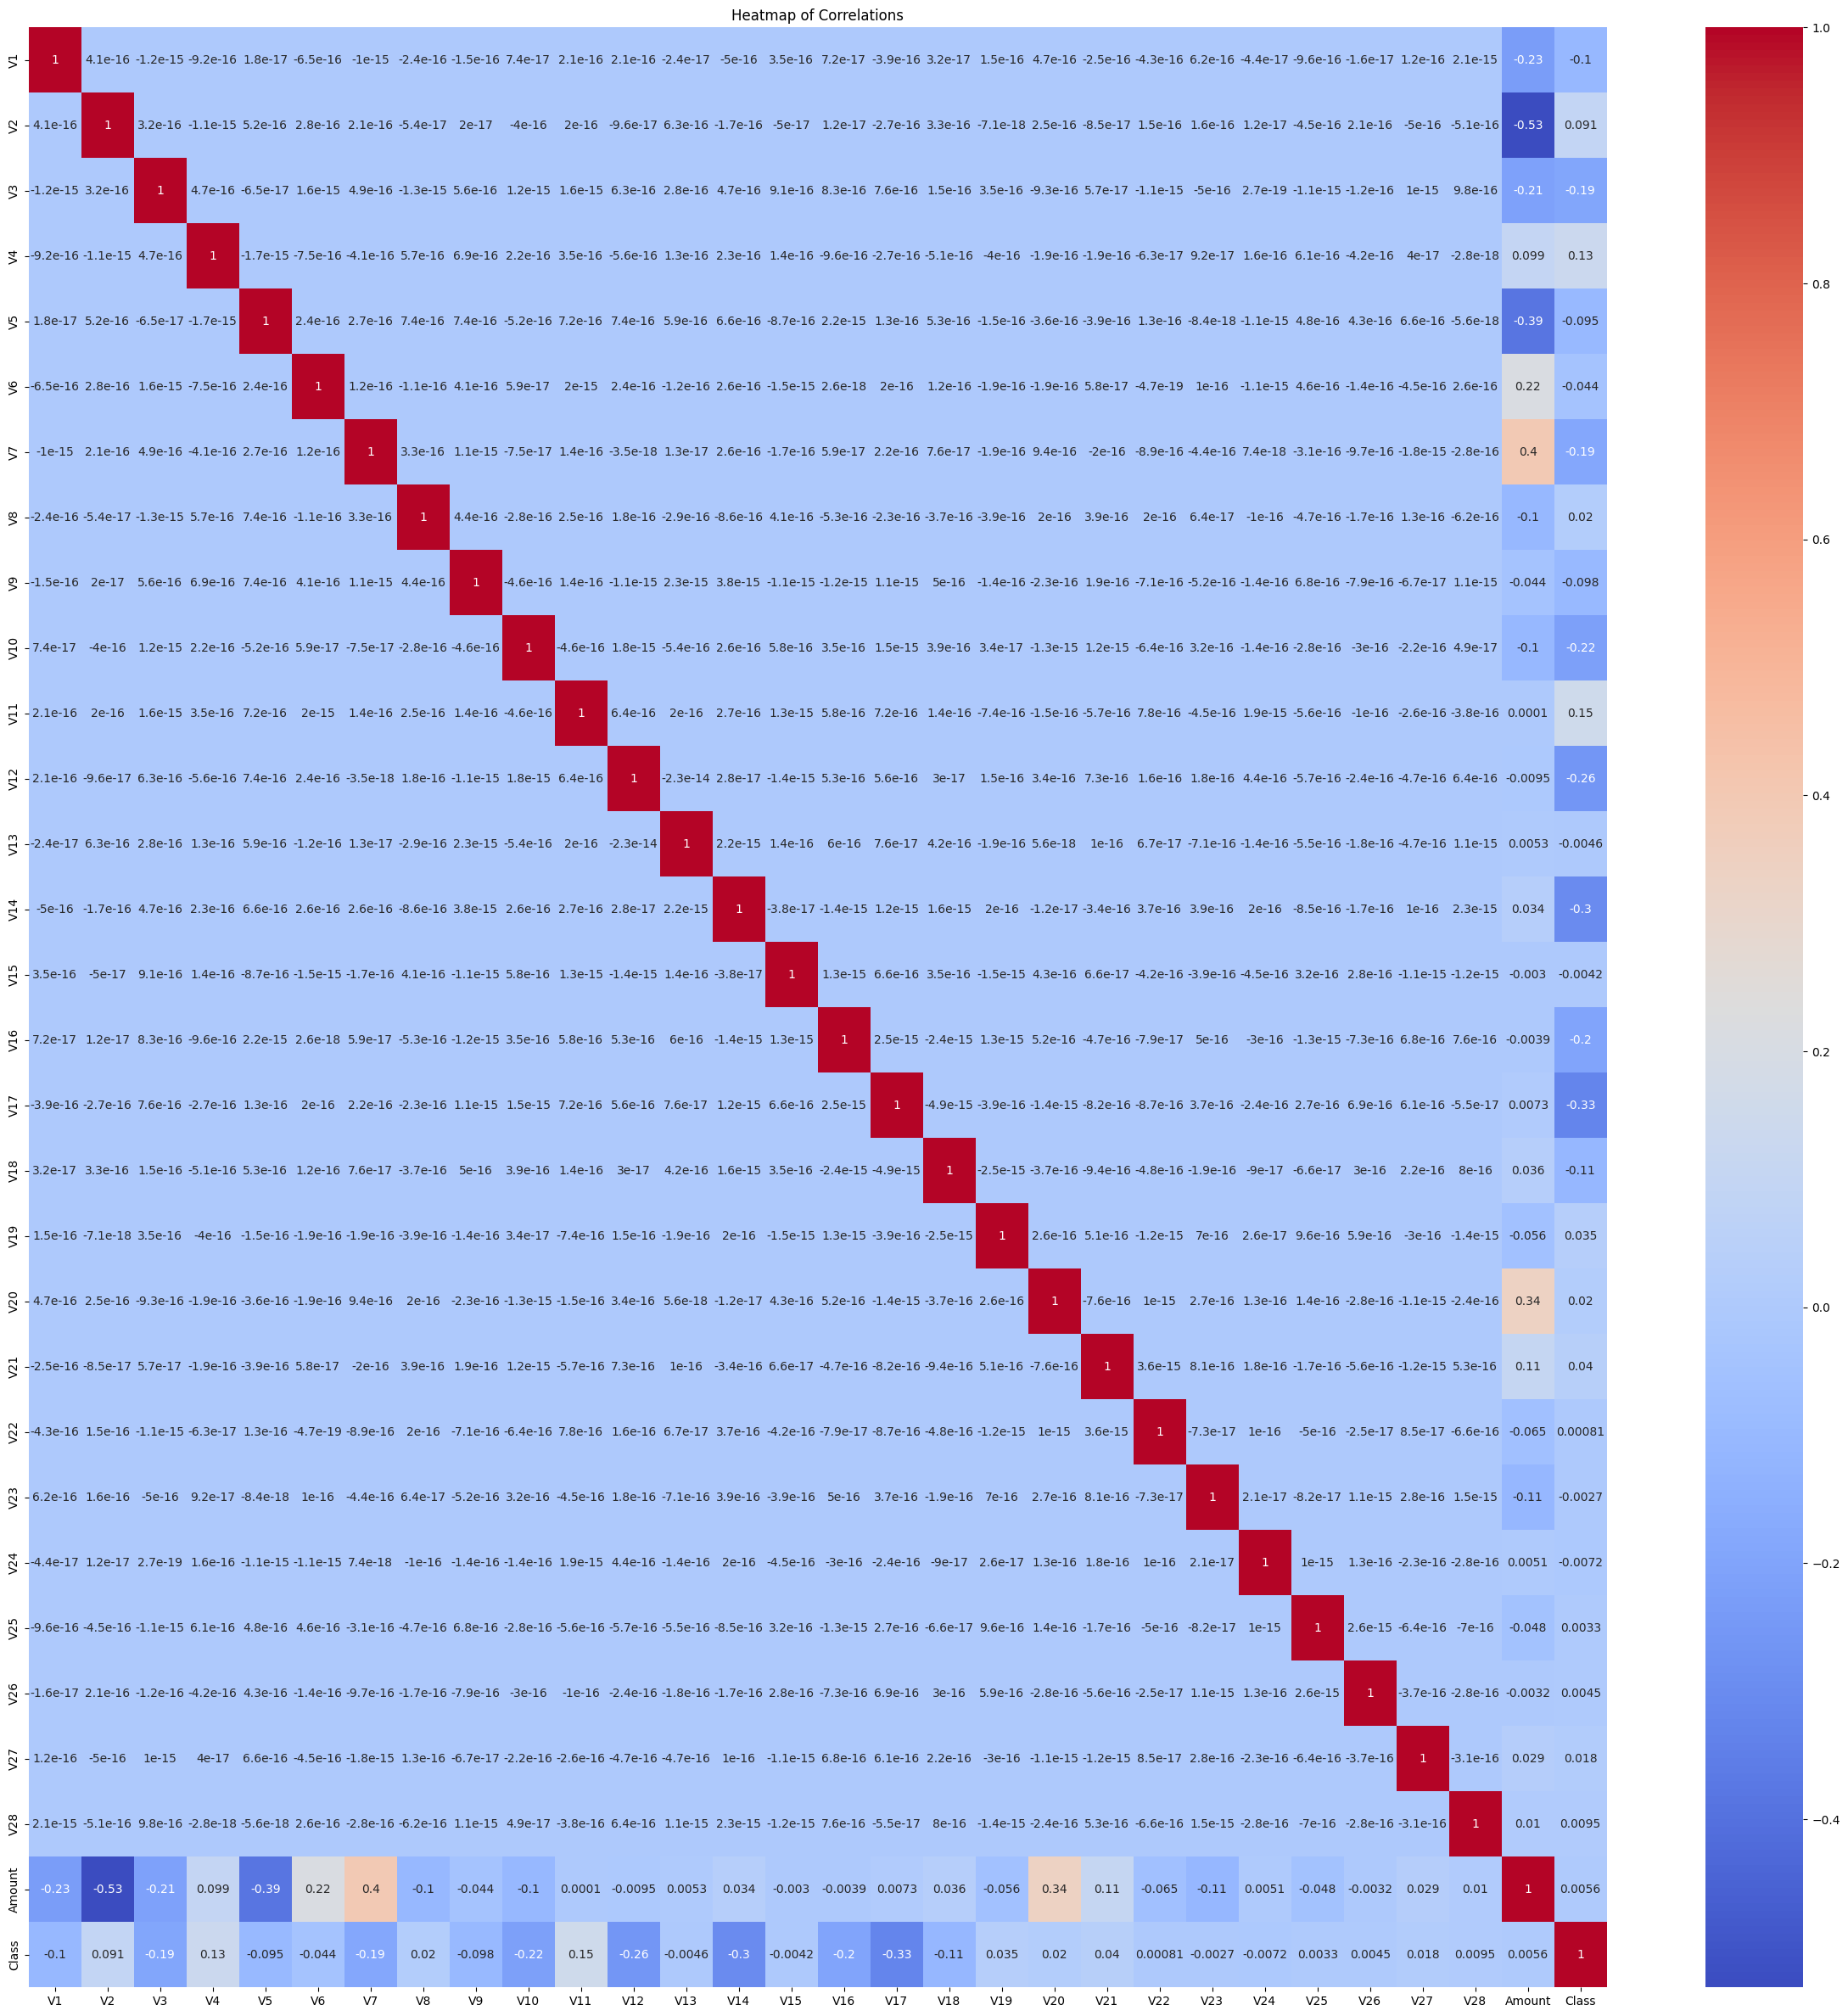

In [ ]:

# Heatmap for correlation between features
plt.figure(figsize=(30,30))
# plt.figure(figsize=(12, 8))
numeric_data = data.apply(pd.to_numeric, errors='coerce')
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlations')
plt.show()


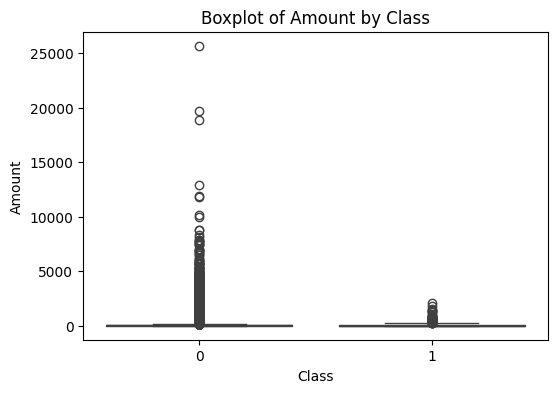

In [ ]:

# Boxplot for a feature (for example, 'Amount')
plt.figure(figsize=(6, 4))
sns.boxplot(x='Class', y='Amount', data=data)
plt.title('Boxplot of Amount by Class')
plt.show()

In [ ]:
data = data[data['Amount'] <= 8000]

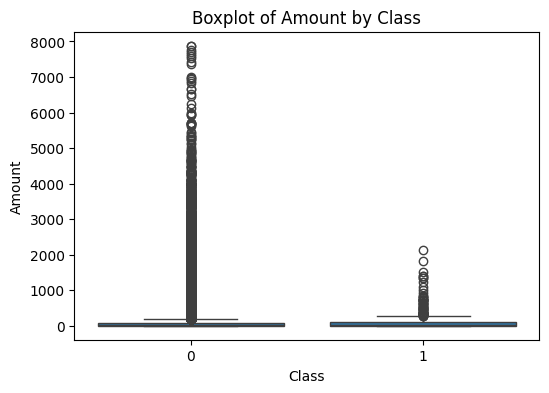

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Class', y='Amount', data=data)
plt.title('Boxplot of Amount by Class')
plt.show()

In [ ]:
data.Class.value_counts()

,count
Class,
0,284303
1,492


In [ ]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [ ]:
X_scaled = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
# set = pd.concat([pd.DataFrame(X_train).reset_index(drop=True), pd.DataFrame(y_train).reset_index(drop=True)], axis=1)


In [ ]:
X_train.shape

(199364, 29, 1)

In [ ]:
# Define class weights with float values to handle imbalance
import tensorflow as tf
class_weights = {0: 1.0, 1: 20.0}    # Adjust weight based on dataset imbalance

def focal_loss(gamma=2.0, alpha=0.25):
    def focal_loss_fixed(y_true, y_pred):
        epsilon = tf.keras.backend.epsilon()
        y_true = tf.cast(y_true, tf.float32)
        y_pred = tf.clip_by_value(y_pred, epsilon, 1 - epsilon)
        pt = tf.where(tf.equal(y_true, 1), y_pred, 1 - y_pred)
        loss = -alpha * tf.pow(1 - pt, gamma) * tf.math.log(pt)
        return tf.reduce_mean(loss)
    return focal_loss_fixed

# Define CNN model with Input layer
model = Sequential([
    Input(shape=(X_train.shape[1], 1)),
    Conv1D(32, kernel_size=2, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Conv1D(64, kernel_size=2, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Conv1D(128, kernel_size=2, activation='relu'),
    BatchNormalization(),
    Flatten(),

    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss=focal_loss(gamma=2.0, alpha=0.25),
              metrics=['accuracy', Precision(), Recall(), AUC()])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test),
                    class_weight=class_weights, callbacks=[early_stopping])

# Lowered threshold to minimize false negatives
y_pred_proba = model.predict(X_test)





Epoch 1/20
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 136s 21ms/step - accuracy: 0.9869 - auc_1: 0.8271 - loss: 0.0091 - precision_1: 0.1743 - recall_1: 0.6352 - val_accuracy: 0.9988 - val_auc_1: 0.7398 - val_loss: 0.0034 - val_precision_1: 0.9216 - val_recall_1: 0.3176
Epoch 2/20
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 132s 19ms/step - accuracy: 0.9988 - auc_1: 0.8908 - loss: 0.0034 - precision_1: 0.6546 - recall_1: 0.7298 - val_accuracy: 0.9992 - val_auc_1: 0.9447 - val_loss: 0.0012 - val_precision_1: 0.7832 - val_recall_1: 0.7568
Epoch 3/20
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 130s 17ms/step - accuracy: 0.9990 - auc_1: 0.9374 - loss: 0.0011 - precision_1: 0.8065 - recall_1: 0.5557 - val_accuracy: 0.9992 - val_auc_1: 0.9144 - val_loss: 0.0012 - val_precision_1: 0.8125 - val_recall_1: 0.7027
Epoch 4/20
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 104s 17ms/step - accuracy: 0.9989 - auc_1: 0.9368 - loss: 0.0015 - precision_1: 0.7509 - recall_1: 0.5717 - val_accuracy: 0.9992 - val_auc_1: 0.9575 - val_loss: 4.9680e-04 - val_pre

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.75      0.79      0.77       148

    accuracy                           1.00     85443
   macro avg       0.87      0.90      0.88     85443
weighted avg       1.00      1.00      1.00     85443

Confusion Matrix:
 [[85256    39]
 [   31   117]]


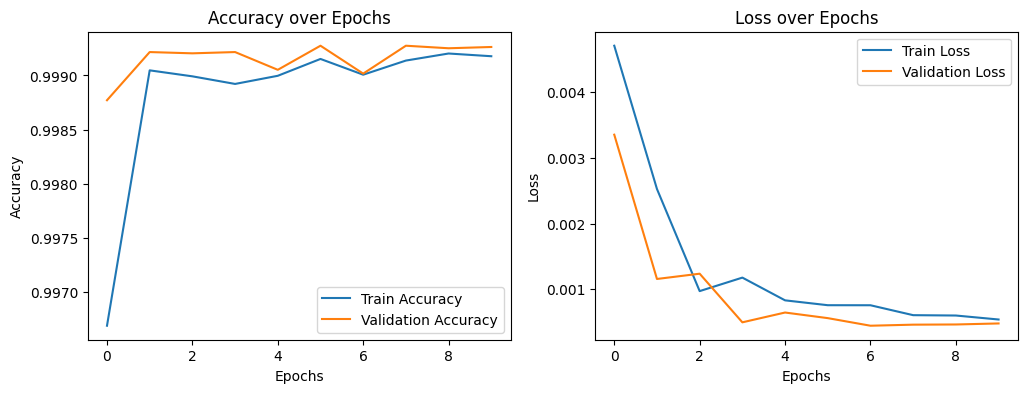

In [ ]:
threshold = 0.2
y_pred = (y_pred_proba > threshold).astype(int)
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.show()

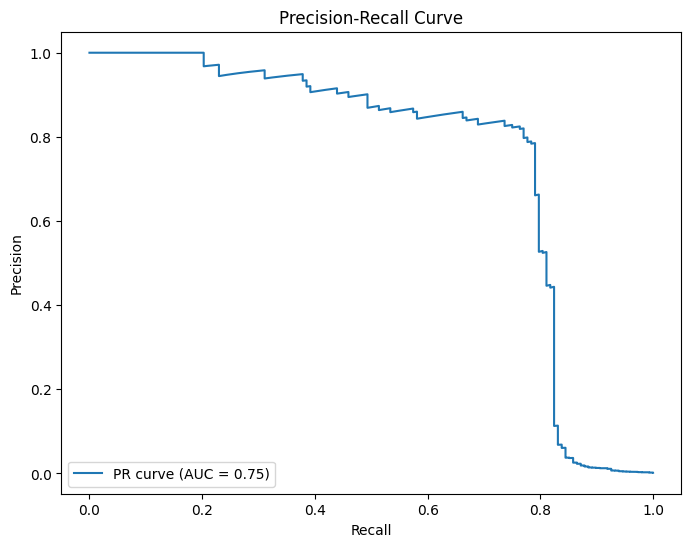

In [ ]:
from sklearn.metrics import precision_recall_curve, auc

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

pr_auc = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='PR curve (AUC = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

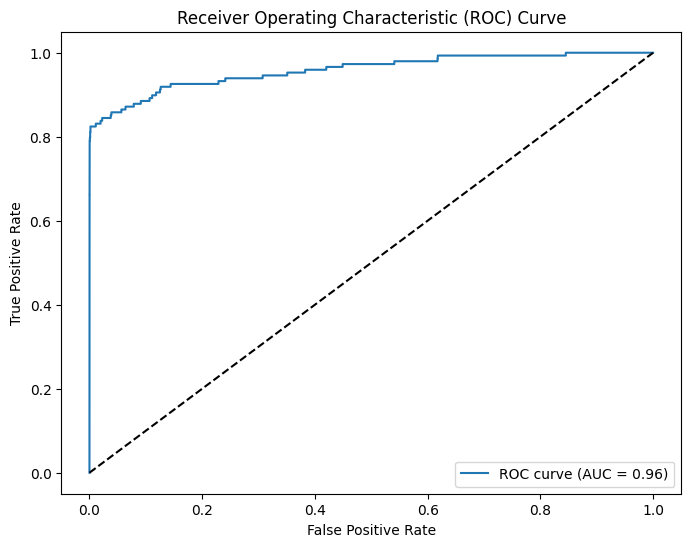

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, roc_thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()